## Complete Case Analysis


Complete-case analysis (CCA), also called "list-wise deletion" of cases, consists in **discarding** observations where values in **any** of the variables are missing. Complete Case Analysis means literally analysing only those observations for which there is information in **all** of the variables in the dataset. 

### Which variables can I impute with CCA?

CCA can be applied to both categorical and numerical variables.


### Assumptions

CCA works well when the data are missing completely at random (MCAR). In fact, we should use CCA if we have reasons to believe that data is missing at random, and not otherwise. When data is MCAR, excluding observations with missing information is in essence the same as randomly excluding some observations from the dataset. Therefore the dataset after CCA is a fair representation of the original dataset. 


### Advantages

- Easy to implement
- No data manipulation required
- Preserves variable distribution (if data is MCAR, then the distribution of the variables of the reduced dataset should match the distribution in the original dataset)

### Disadvantages

- It can exclude a large fraction of the original dataset (if missing data is abundant)
- Excluded observations could be informative for the analysis (if data is not missing at random)
- CCA will create a biased dataset if the complete cases differ from the original data (e.g., when missing information is in fact MAR or NMAR and not missing at random).
- When using our models in production, the model will not know how to handle missing data

### When to use CCA

- Data is missing completely at random
- No more than 5% of the total dataset contains missing data

In practice, CCA may be an acceptable method when the amount of missing information is small. Unfortunately, there is no rule of thumb to determine how much missing data is small or negligible. However, as general guidance, if the total amount of missing data is ~5% of the original dataset or less, CCA is a viable option.

In many real life datasets, the amount of missing data is never small, and therefore CCA is typically never an option.

### CCA and models in production

When using CCA, we remove all observations that contain missing information. However, the data that we want to score with our model, may indeed contain missing information. This will pose a problem when using our model in live systems, or as we call it, when putting or models into production: when an observation contains missing data, the model will not be able to handle it. 

In order to avoid this problem, when putting models into production we need to do 1 of 2 things: either we do not score observations with missing data, or we replace the missing values by another number. We can choose any from the imputation techniques that we will discuss in the following lectures to replace NA in the data to be scored.

## In this demo:

We will use the House Prices dataset to demonstrate how to perform Complete Case Analysis.

- For instructions on how to download the dataset, please refer to the lecture **Datasets** in **Section 1** of the course.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to show all the columns of the dataframe in the notebook
pd.set_option('display.max_columns', None)

In [2]:
# load the House Prices dataset
# and print out its shape (rows and columns)
data = pd.read_csv("houseprice.csv")
data.shape

(1460, 81)

In [3]:
# visualise the dataset 1st 5 rows
data.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [4]:
# find the variables with missing observations and store it in a list
# print out the list
vars_with_na = []
for col in data.columns:
    if data[col].isnull().sum()>0 :
        vars_with_na.append(col)


#show
#vars_with_na

In [5]:
# find out the datatype of the missing values whether they are numerical or categorical
# You can use dtypes to findout the type of each column
# https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

#data[vars_with_na].dtypes

There are both numerical and categorical variables with missing observations. We can see from the variable types that some are float and some are object.

In [6]:
# have a look at 1st 10 rows where the values of the variables with is missing 

data[vars_with_na].head(1)

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN


In [8]:
# let's find out the percentage of observations missing per variable

# calculate the percentage of missing and store them as a seperate variable
# using the isnull() and mean() methods from pandas
data_na = data[vars_with_na].isnull().mean()

# transform the array into a dataframe
# https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
data_na = pd.DataFrame(data_na.reset_index())
#print(data_na)
#print("=========")
# add column names 'variable' and 'na_percentage' to the dataframe
# https://pandas.pydata.org/pandas-docs/stable/reference/frame.html
data_na.columns = ['variable', 'na_percentage']

# order the dataframe in place according to percentage of na per variable in descending order 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html#pandas.DataFrame.sort_valuesl
data_na.sort_values(by='na_percentage', ascending=False, inplace=True)

# show
#data_na

The first 6 variables contain a lot of missing information. So we can't use CCA if we consider those variables, as most of the observations in the dataset will be discarded. We could otherwise use CCA if we omit using those variables with a lot of NA.

For this demo, I will ignore the first 6 variables with a lot of missing data, and proceed with CCA in the remaining of the dataset.

In [9]:
# capture variables with no or less than 5% NA as in [4]
vars_cca = []
for col in data.columns:
    if data[col].isnull().mean() < 0.05:
        vars_cca.append(col)
#show
# vars_cca

In [10]:
# calculate percentage of observations with complete
# cases: i.e., with values for all the variables
# test=data.dropna()
# print(len(test))

data_noNA=data[vars_cca].dropna()
print(len(data_noNA)/len(data))
# the method dropna(), discards the observations that contain
# na in any of the rows / columns


0.9671232876712329


In [11]:
# create the complete case dataset
# in other words, remove observations with na in any variable

data_cca = data[vars_cca].dropna()

# get dimensions of data and data_ccs
data.shape, data_cca.shape

((1460, 81), (1412, 70))

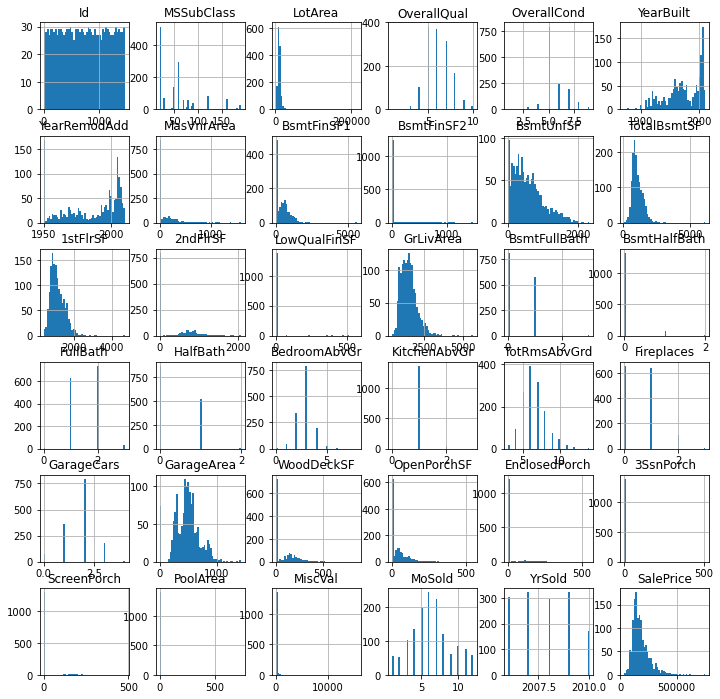

In [23]:
# plot the histograms for all numerival variables in the complete case dataset with 50 bins 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

data_cca.hist(bins=50, figsize=(12, 12))
plt.show()

<AxesSubplot:>

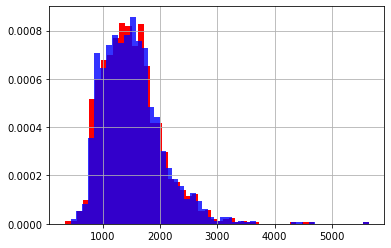

In [26]:
## let's check the distribution of a few variables before and after 
# cca: histogram with 50 bins 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

fig = plt.figure()
ax = fig.add_subplot(111)

# original data
data['GrLivArea'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
data_cca['GrLivArea'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

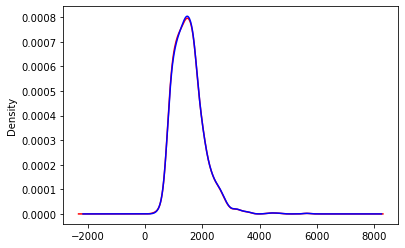

In [27]:
## let's check the distribution of a few variables before and after 
# cca: density plot
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot original data in red color
data['GrLivArea'].plot.density(color='red')

# Plot data after cca in blue color
data_cca['GrLivArea'].plot.density(color='blue')

<AxesSubplot:>

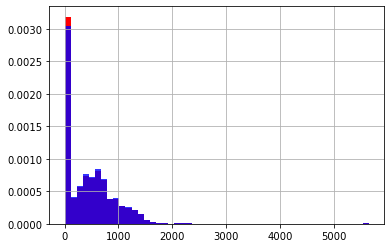

In [29]:
## let's check the distribution of a few variables before and after 
# cca: histogram with 50 bins 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot original data in red color
data['BsmtFinSF1'].hist(bins=50, ax=ax, density=True, color='red')

# Plot data after cca in blue color , the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
data_cca['BsmtFinSF1'].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

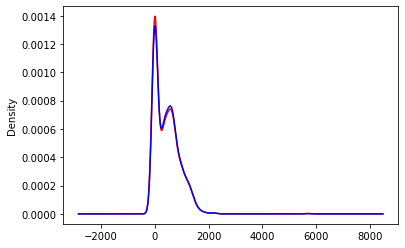

In [30]:
## let's check the distribution of a few variables before and after 
# cca: density plot
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html

fig = plt.figure()
ax = fig.add_subplot(111)

# Plot original data in red color
data['BsmtFinSF1'].plot.density(color='red')

# Plot data after cca in blue color
data_cca['BsmtFinSF1'].plot.density(color='blue')

As we can see from the above plots, the distribution of the selected numerical variables in the original and complete case dataset is very similar, which is what we expect from CCA if data is missing at random and only for a small proportion of the observations.

In [31]:
print("ABDELMAKSOUD")

ABDELMAKSOUD
